In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
##Load the dataset
#df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/temp/diabetes.csv')

#Print the first 5 rows of the dataframe.
#df.head()

url = "https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv"
path = '/content/drive/My Drive/Colab Notebooks/temp/'
filename = 'diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df = read_csv(path+filename)
array = df.values
X = array[:,0:8]
y = array[:,8]


In [ ]:
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = SVC()
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())


0.760457963089542


In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7, shuffle=True)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.770865 (0.050905)
LDA: 0.766969 (0.047966)
KNN: 0.710988 (0.050792)
CART: 0.690260 (0.048758)
NB: 0.759142 (0.038960)
SVM: 0.760458 (0.034712)


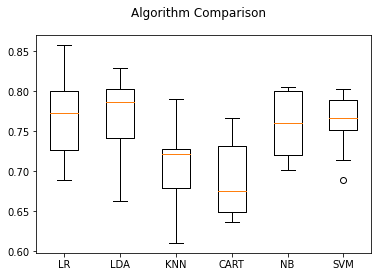

In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

In [ ]:
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
# estimators.append(('logistic', LogisticRegression(solver='liblinear')))
# estimators.append(('LDA', LinearDiscriminantAnalysis()))
# estimators.append(('KNN', KNeighborsClassifier()))
# estimators.append(('CART', DecisionTreeClassifier()))
# estimators.append(('NB', GaussianNB()))
estimators.append(('SVM', SVC()))
model = Pipeline(estimators)

In [ ]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7513328776486672


In [2]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
# estimators.append(('lda', LinearDiscriminantAnalysis()))
estimators.append(('SVM', SVC()))
model = Pipeline(estimators)

In [10]:
# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print(results.mean())


[0.83116883 0.75324675 0.66233766 0.77922078 0.76623377 0.79220779
 0.64935065 0.79220779 0.80263158 0.73684211]
0.7565447710184552
